In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Set visualization style
sns.set(style="whitegrid")

In [2]:
# Load the dataset
file_path = r'D:\python\ML\2\heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Convert numeric columns properly
numeric_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']
heart_data[numeric_columns] = heart_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values
heart_data = heart_data.dropna()

# Verify the cleaned dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


C:\Users\MirAshkan\AppData\Local\Temp\ipykernel_46924\4254128126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=heart_data, palette='viridis')


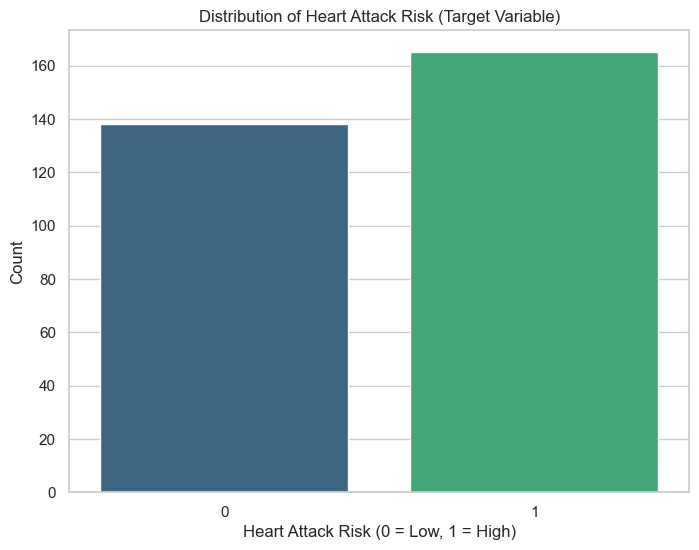

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=heart_data, palette='viridis')
plt.title('Distribution of Heart Attack Risk (Target Variable)')
plt.xlabel('Heart Attack Risk (0 = Low, 1 = High)')
plt.ylabel('Count')
plt.show()

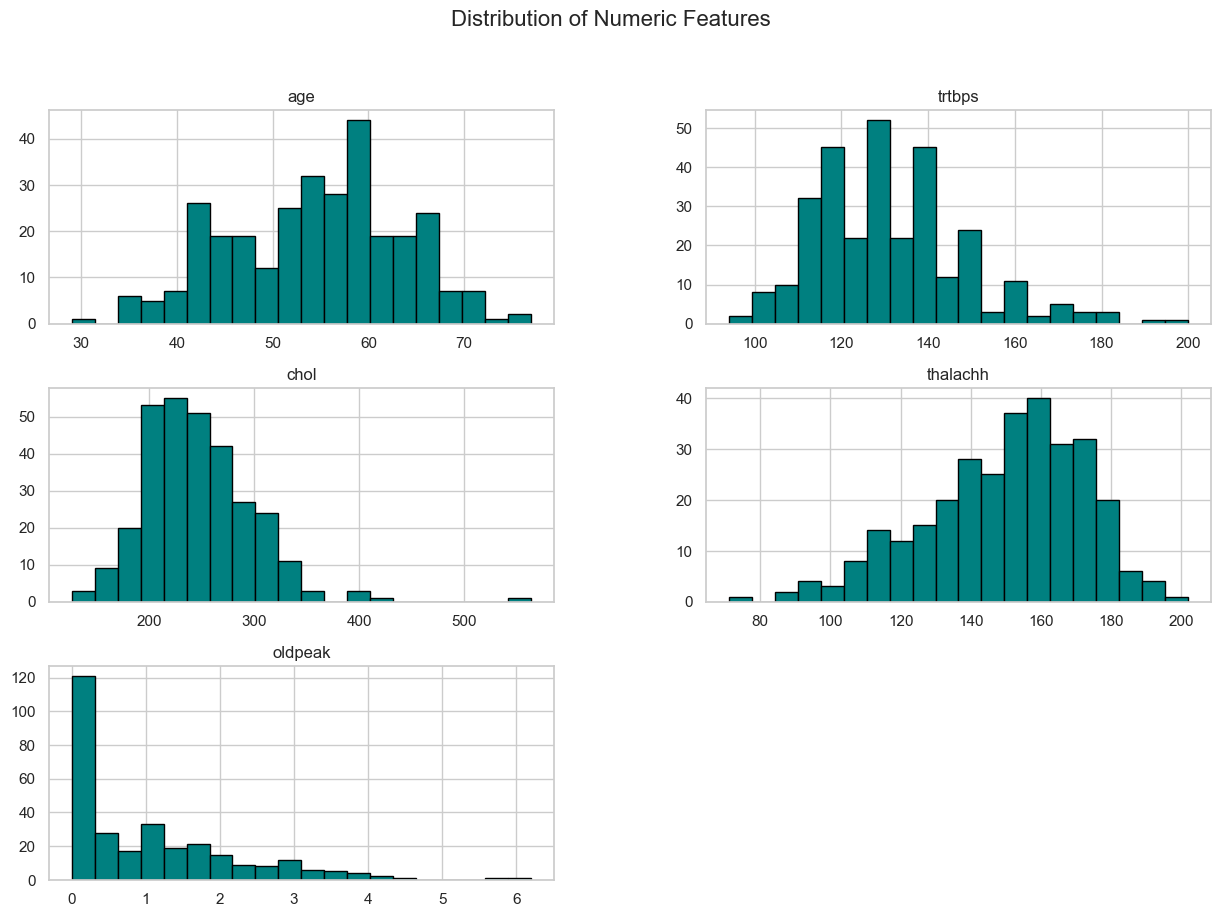

In [5]:
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
heart_data[numeric_features].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

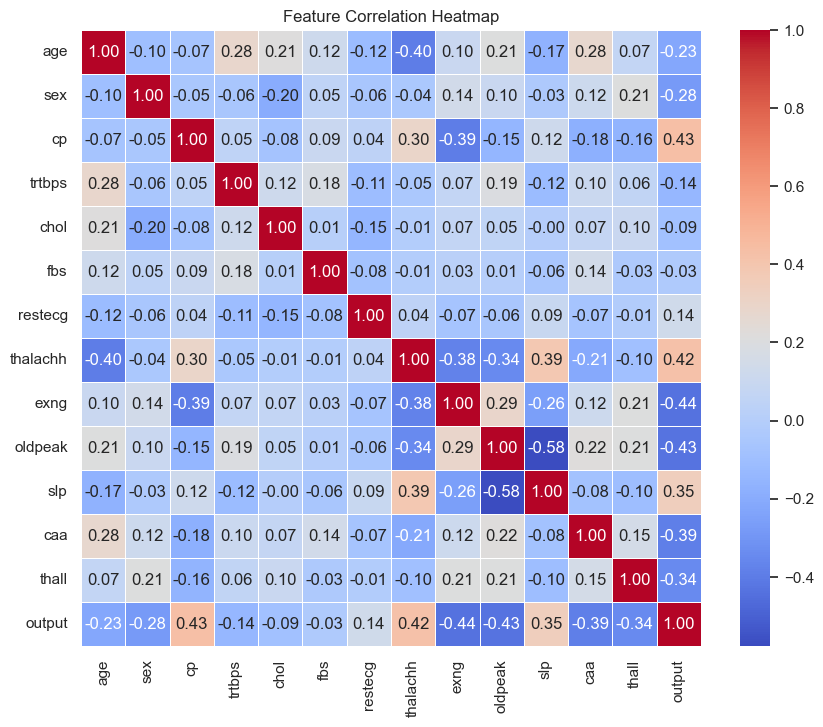

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# Define features (X) and target (y)
X = heart_data.drop(columns=['output'])
y = heart_data['output']

# Split the dataset into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify shapes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (242, 13), Testing Set: (61, 13)


In [8]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
f2_score_logistic = fbeta_score(y_test, y_pred_logistic, beta=2)
print(f"Logistic Regression F2-Score: {f2_score_logistic:.2f}")

Logistic Regression F2-Score: 0.85


In [9]:
# Find the best K value using GridSearchCV
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='f1', cv=5)
grid_knn.fit(X_train, y_train)

knn_model = grid_knn.best_estimator_
y_pred_knn = knn_model.predict(X_test)
f2_score_knn = fbeta_score(y_test, y_pred_knn, beta=2)
print(f"KNN Best K: {grid_knn.best_params_['n_neighbors']}, F2-Score: {f2_score_knn:.2f}")

KNN Best K: 16, F2-Score: 0.88


In [10]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, scoring='f1', cv=5)
grid_svm.fit(X_train, y_train)

svm_model = grid_svm.best_estimator_
y_pred_svm = svm_model.predict(X_test)
f2_score_svm = fbeta_score(y_test, y_pred_svm, beta=2)
print(f"SVM Best Params: {grid_svm.best_params_}, F2-Score: {f2_score_svm:.2f}")

SVM Best Params: {'C': 0.1, 'kernel': 'rbf'}, F2-Score: 0.90


In [11]:
param_grid_dt = {'max_depth': [2, 4, 6, 8, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, scoring='f1', cv=5)
grid_dt.fit(X_train, y_train)

dt_model = grid_dt.best_estimator_
y_pred_dt = dt_model.predict(X_test)
f2_score_dt = fbeta_score(y_test, y_pred_dt, beta=2)
print(f"Decision Tree Best Depth: {grid_dt.best_params_['max_depth']}, F2-Score: {f2_score_dt:.2f}")

Decision Tree Best Depth: 6, F2-Score: 0.82



Confusion Matrix for Logistic Regression


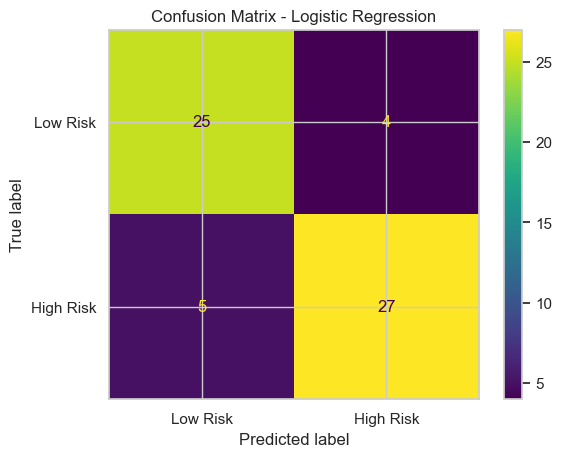


Confusion Matrix for KNN


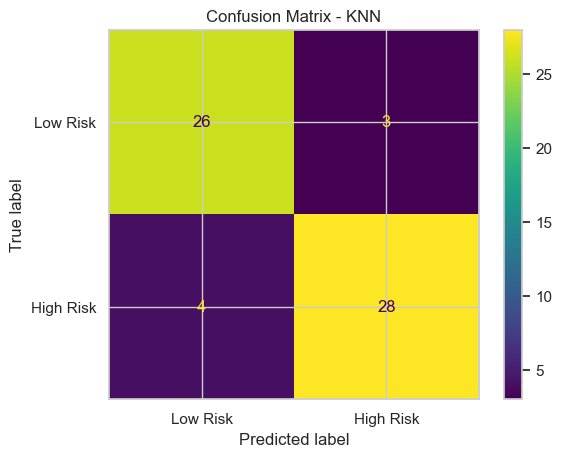


Confusion Matrix for SVM


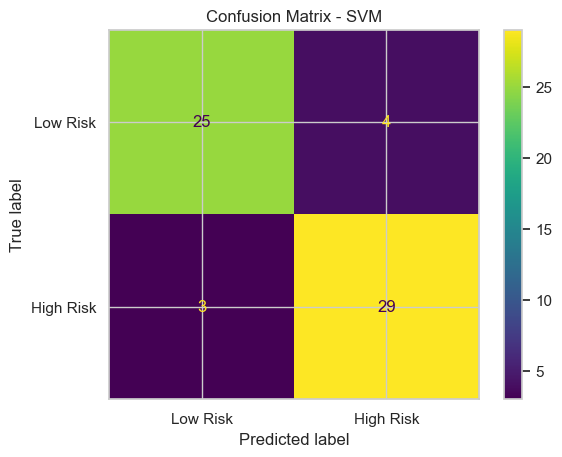


Confusion Matrix for Decision Tree


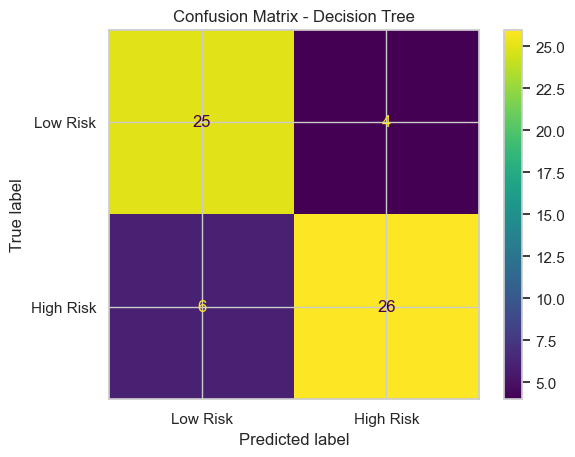

In [12]:
models = {
    "Logistic Regression": y_pred_logistic,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Decision Tree": y_pred_dt
}

for model_name, y_pred in models.items():
    print(f"\nConfusion Matrix for {model_name}")
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Low Risk', 'High Risk'])
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

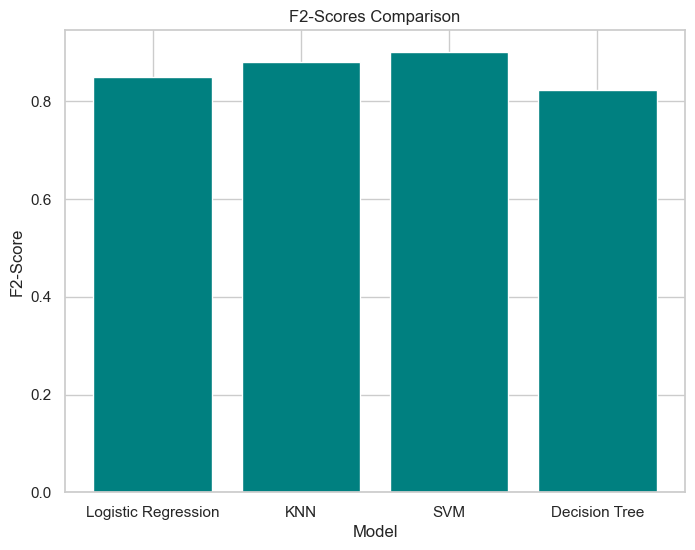

In [13]:
f2_scores = {
    "Logistic Regression": f2_score_logistic,
    "KNN": f2_score_knn,
    "SVM": f2_score_svm,
    "Decision Tree": f2_score_dt
}

plt.figure(figsize=(8, 6))
plt.bar(f2_scores.keys(), f2_scores.values(), color='teal')
plt.title('F2-Scores Comparison')
plt.ylabel('F2-Score')
plt.xlabel('Model')
plt.show()

In [ ]:
# SVM IS THE BEST FOR THIS MODEL